In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/preprocessed_data.csv")
pd.set_option('display.max_columns', None)
df.head(2)

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,credit_rating
0,19.0,9.215427,1.0,1,22.598761,2.0,17.0,372.0,5.0,2,7.962416,0,0,1,0,1,0,1,0,0,1,0,1,1
1,39.0,10.363441,3.0,2,15.569731,1.0,12.0,694.0,2.0,1,7.303170,0,1,0,1,0,0,0,0,0,0,0,1,3


Exploratory Data Analysis

In [4]:
# Shape and overview
print("Dataset shape:", df.shape)
display(df.head())

# Data types and missing values
df.info()

# Summary stats for numerical columns
display(df.describe())


Dataset shape: (1200000, 24)


,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,credit_rating
0,19.0,9.215427,1.0,1,22.598761,2.0,17.0,372.0,5.0,2,7.962416,0,0,1,0,1,0,1,0,0,1,0,1,1
1,39.0,10.363441,3.0,2,15.569731,1.0,12.0,694.0,2.0,1,7.303170,0,1,0,1,0,0,0,0,0,0,0,1,3
2,23.0,10.150504,3.0,0,47.177549,1.0,14.0,595.0,3.0,2,6.343880,1,0,1,1,0,0,1,0,1,0,0,1,1
3,21.0,11.481156,2.0,1,10.938144,1.0,0.0,367.0,1.0,3,6.642487,1,0,0,1,1,0,0,0,0,0,0,0,1
4,21.0,10.587922,1.0,1,20.376094,0.0,8.0,598.0,4.0,2,7.612831,1,0,1,1,0,1,1,0,0,0,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Age                        1200000 non-null  float64
 1   Annual Income              1200000 non-null  float64
 2   Number of Dependents       1200000 non-null  float64
 3   Education Level            1200000 non-null  int64  
 4   Health Score               1200000 non-null  float64
 5   Previous Claims            1200000 non-null  float64
 6   Vehicle Age                1200000 non-null  float64
 7   Credit Score               1200000 non-null  float64
 8   Insurance Duration         1200000 non-null  float64
 9   Exercise Frequency         1200000 non-null  int64  
 10  Premium Amount             1200000 non-null  float64
 11  Gender_Male                1200000 non-null  int64  
 12  Policy Type_Comprehensive  1200000 non-null  int64  
 13  Policy Type_

,Age,Annual Income,Number of Dependents,Education Level,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Exercise Frequency,Premium Amount,Gender_Male,Policy Type_Comprehensive,Policy Type_Premium,Smoking Status_Yes,Marital Status_Married,Marital Status_Single,Occupation_Self-Employed,Occupation_Unemployed,Location_Suburban,Location_Urban,Property Type_Condo,Property Type_House,credit_rating
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,4.114556e+01,9.766829e+00,2.009026e+00,1.517826e+00,2.554798e+01,9.627725e-01,9.569891e+00,5.932019e+02,5.018219e+00,1.496584e+00,6.590575e+00,5.021425e-01,3.330000e-01,3.348717e-01,5.015608e-01,3.336142e-01,3.362258e-01,3.729050e-01,2.509225e-01,3.346183e-01,3.312592e-01,3.330608e-01,3.336242e-01,2.028490e+00
std,1.343401e+01,1.310746e+00,1.351022e+00,1.112623e+00,1.182379e+01,7.136058e-01,5.776174e+00,1.411080e+02,2.594330e+00,1.113541e+00,1.080565e+00,4.999956e-01,4.712867e-01,4.719458e-01,4.999978e-01,4.715039e-01,4.724174e-01,4.835774e-01,4.335442e-01,4.718571e-01,4.706662e-01,4.713083e-01,4.715074e-01,1.348527e+00
min,1.800000e+01,1.098612e+00,0.000000e+00,0.000000e+00,2.012237e+00,0.000000e+00,0.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00,3.091042e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+01,9.065083e+00,1.000000e+00,1.000000e+00,1.655457e+01,0.000000e+00,5.000000e+00,4.840000e+02,3.000000e+00,1.000000e+00,6.246107e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,4.114262e+01,1.008209e+01,2.000000e+00,2.000000e+00,2.458163e+01,1.000000e+00,1.000000e+01,5.950000e+02,5.000000e+00,2.000000e+00,6.773080e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.300000e+01,1.069053e+01,3.000000e+00,3.000000e+00,3.377289e+01,1.000000e+00,1.500000e+01,7.060000e+02,7.000000e+00,2.000000e+00,7.320527e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
max,6.400000e+01,1.148116e+01,4.000000e+00,3.000000e+00,5.897591e+01,2.500000e+00,1.900000e+01,8.490000e+02,9.000000e+00,3.000000e+00,8.007534e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [5]:
# Count of missing values per column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percent': missing_percent})
display(missing_df[missing_df['Missing Values'] > 0])


,Missing Values,Percent


In [6]:
df.columns

Index(['Age', 'Annual Income', 'Number of Dependents', 'Education Level',
       'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score',
       'Insurance Duration', 'Exercise Frequency', 'Premium Amount',
       'Gender_Male', 'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Smoking Status_Yes', 'Marital Status_Married', 'Marital Status_Single',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Location_Suburban', 'Location_Urban', 'Property Type_Condo',
       'Property Type_House', 'credit_rating'],
      dtype='object')

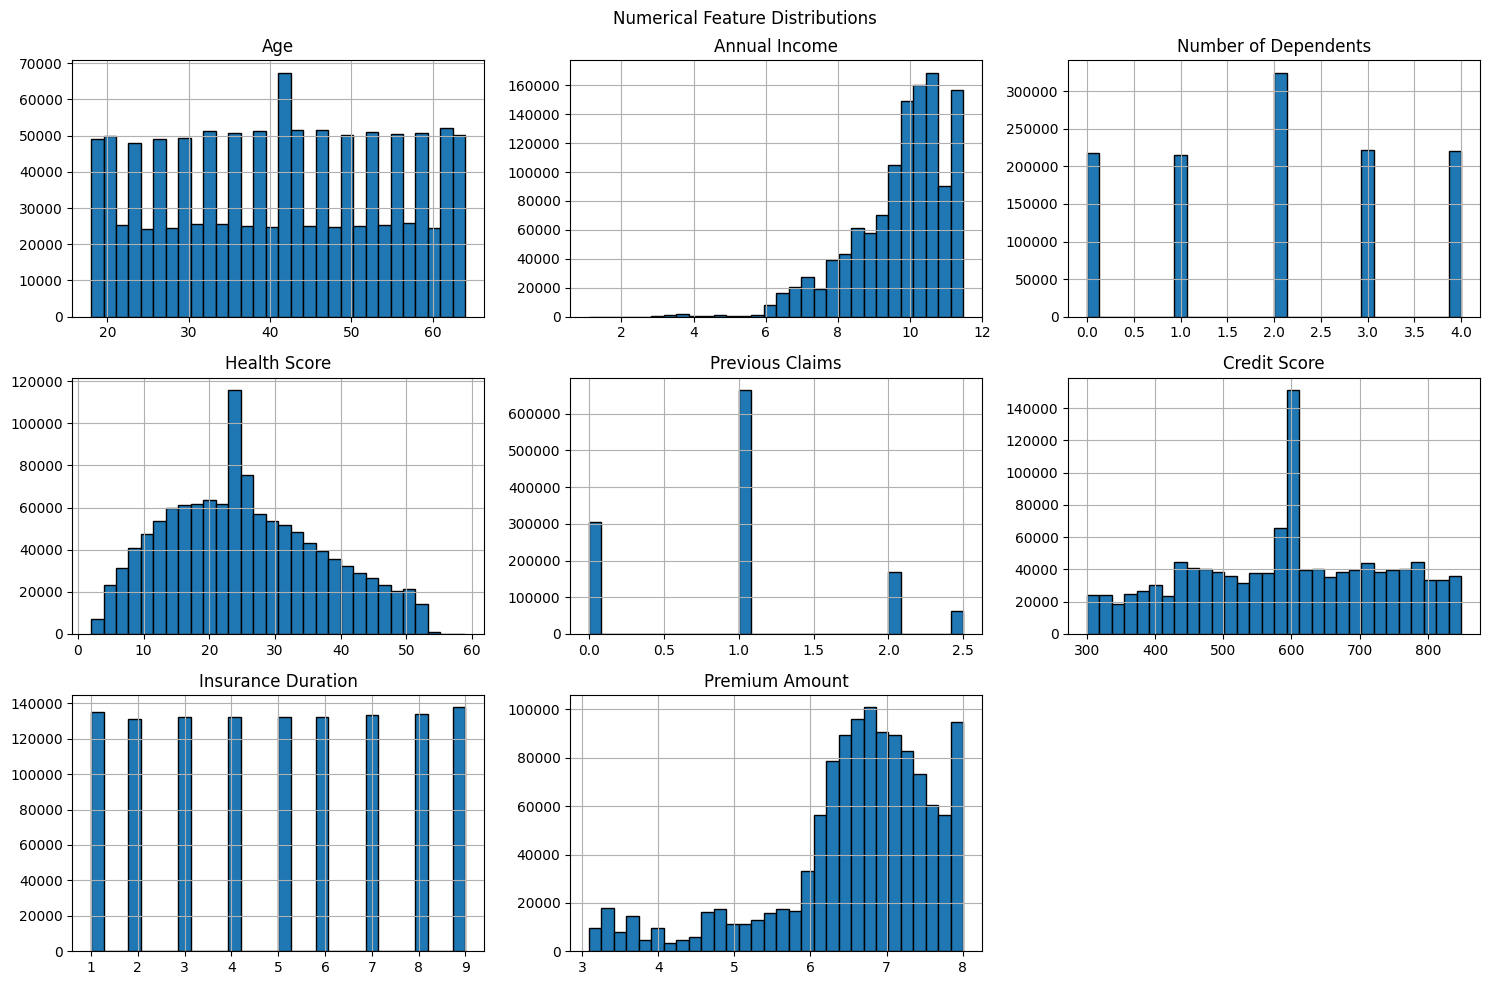

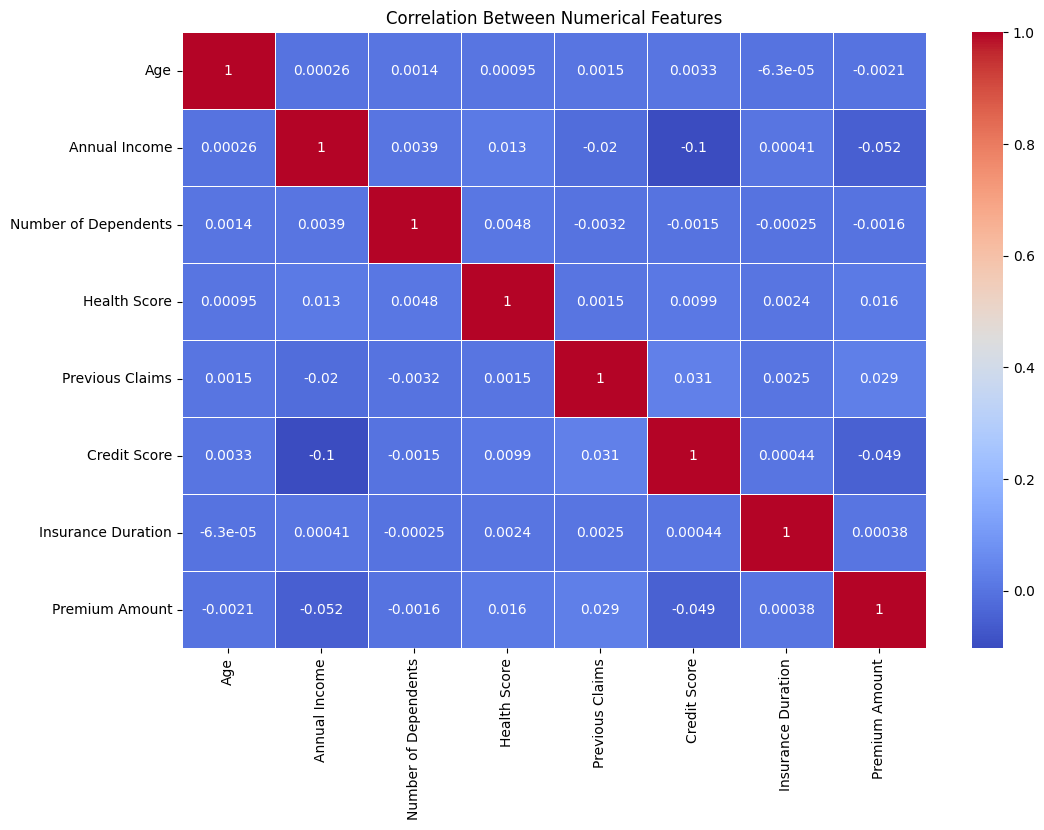

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ['Age', 'Annual Income', 'Number of Dependents',
            'Health Score', 'Previous Claims', 'Credit Score',
            'Insurance Duration', 'Premium Amount', ]

# Histograms
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Numerical Feature Distributions")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Numerical Features")
plt.show()


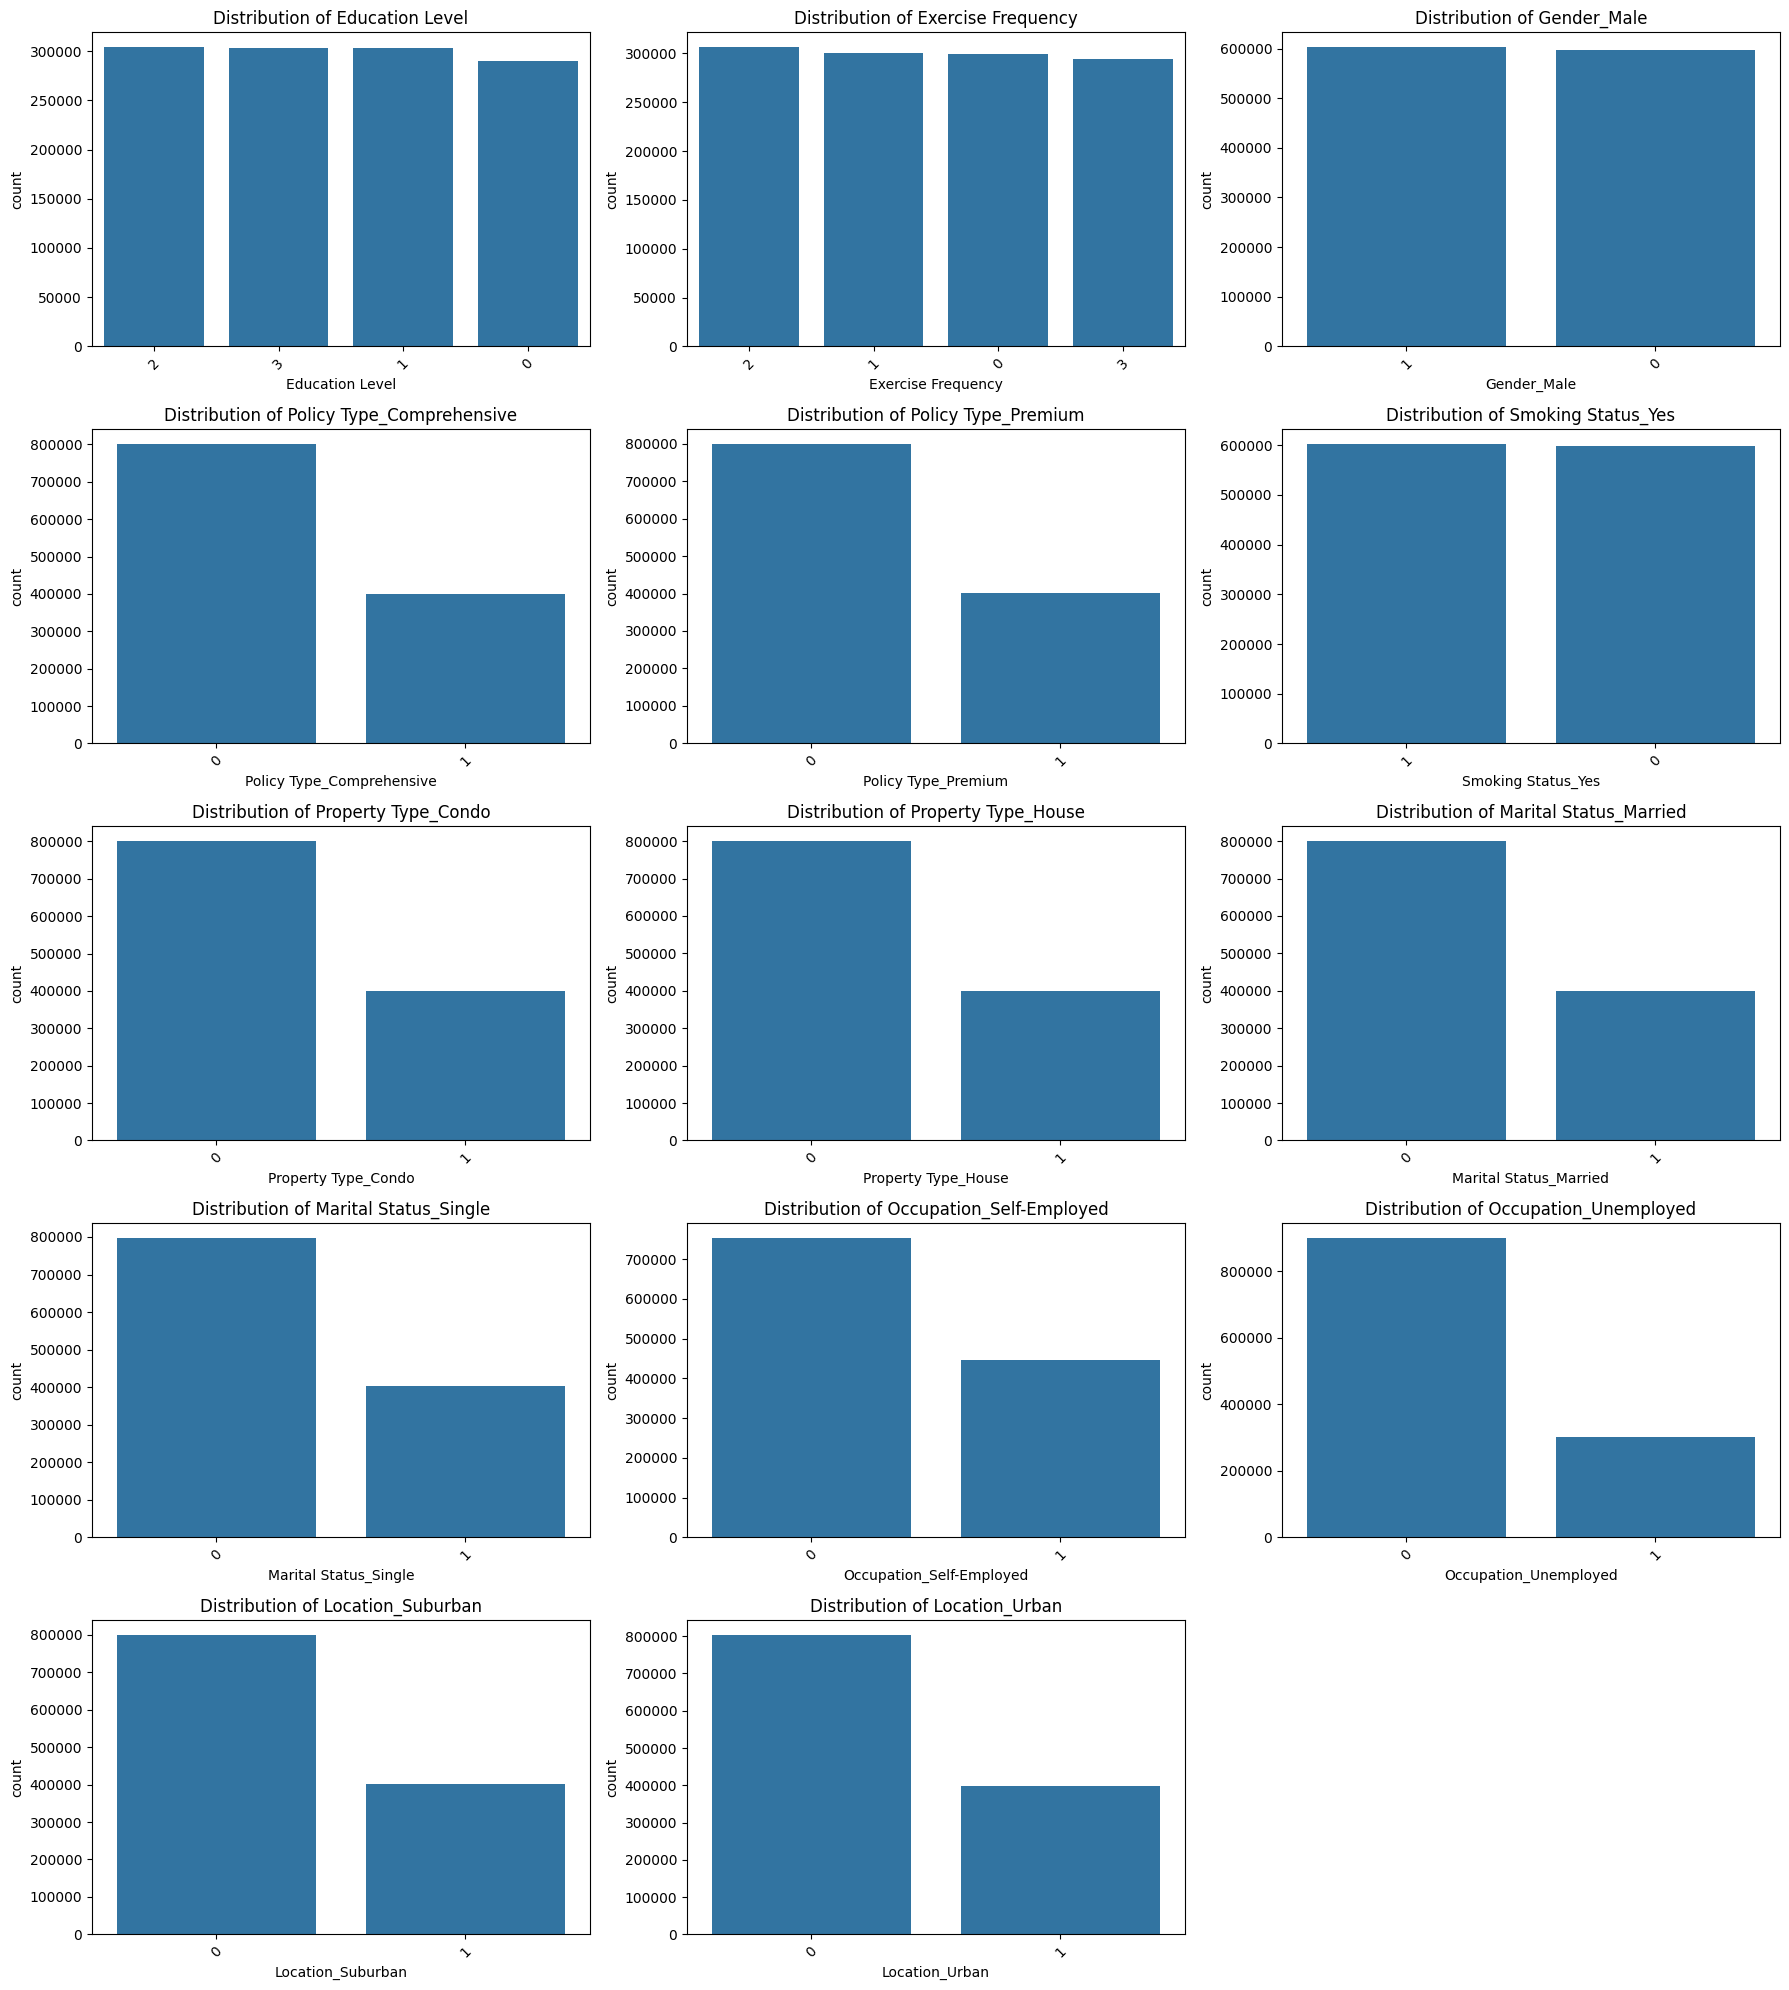

In [9]:
# Define categorical columns
cat_cols = ['Education Level', 'Exercise Frequency', 'Gender_Male', 'Policy Type_Comprehensive',
            'Policy Type_Premium', 'Smoking Status_Yes', 'Property Type_Condo',
            'Property Type_House', 'Marital Status_Married',
            'Marital Status_Single', 'Occupation_Self-Employed',
            'Occupation_Unemployed', 'Location_Suburban', 'Location_Urban']

# Plot setup
num_cols = 3
num_rows = int(np.ceil(len(cat_cols) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

# Create each subplot
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


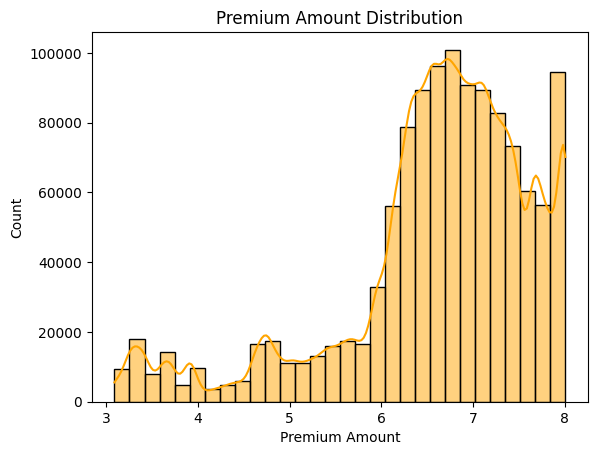

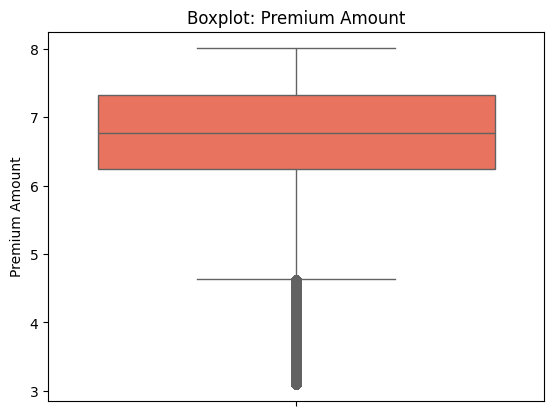

Skewness of Premium Amount: -1.2929277402622923


In [10]:
# Distribution
sns.histplot(df['Premium Amount'], bins=30, kde=True, color='orange')
plt.title("Premium Amount Distribution")
plt.show()

# Boxplot to check outliers
sns.boxplot(df['Premium Amount'], color='tomato')
plt.title("Boxplot: Premium Amount")
plt.show()

# Skewness
print("Skewness of Premium Amount:", df['Premium Amount'].skew())


 Bivariate Analysis (Target vs Features)

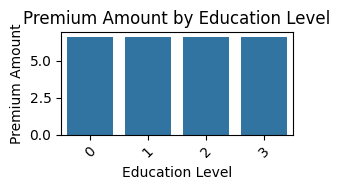

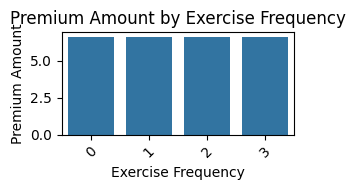

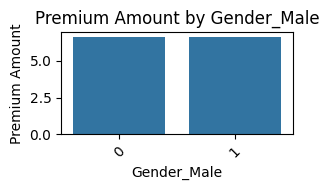

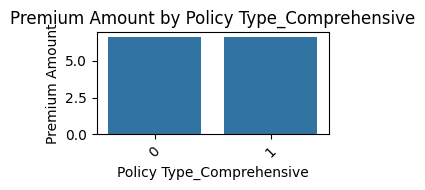

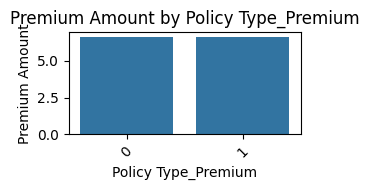

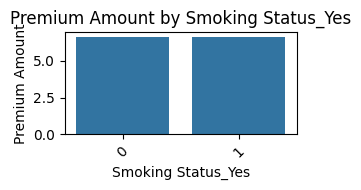

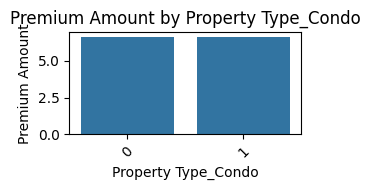

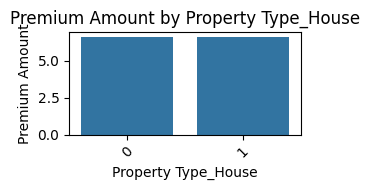

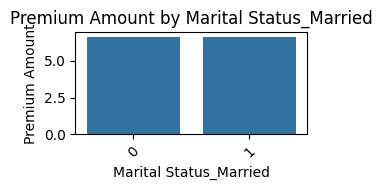

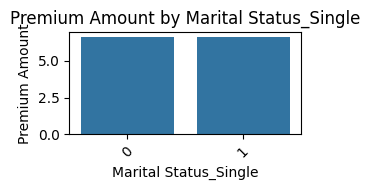

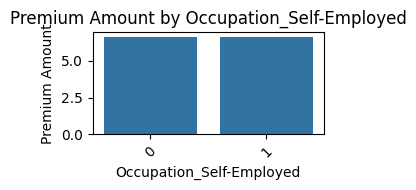

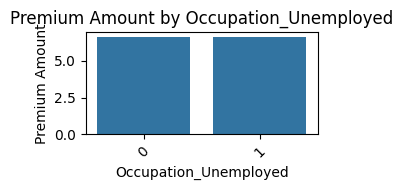

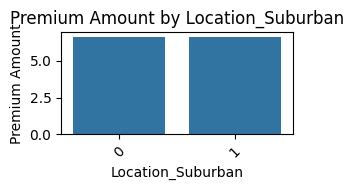

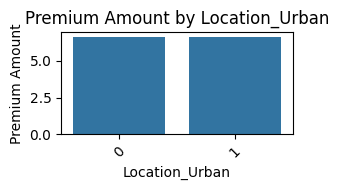

In [11]:
# 🔹 Categorical vs Target
for col in cat_cols:
    plt.figure(figsize=(3,2))
    sns.barplot(x=col, y='Premium Amount', data=df, estimator=np.mean)
    plt.title(f"Premium Amount by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


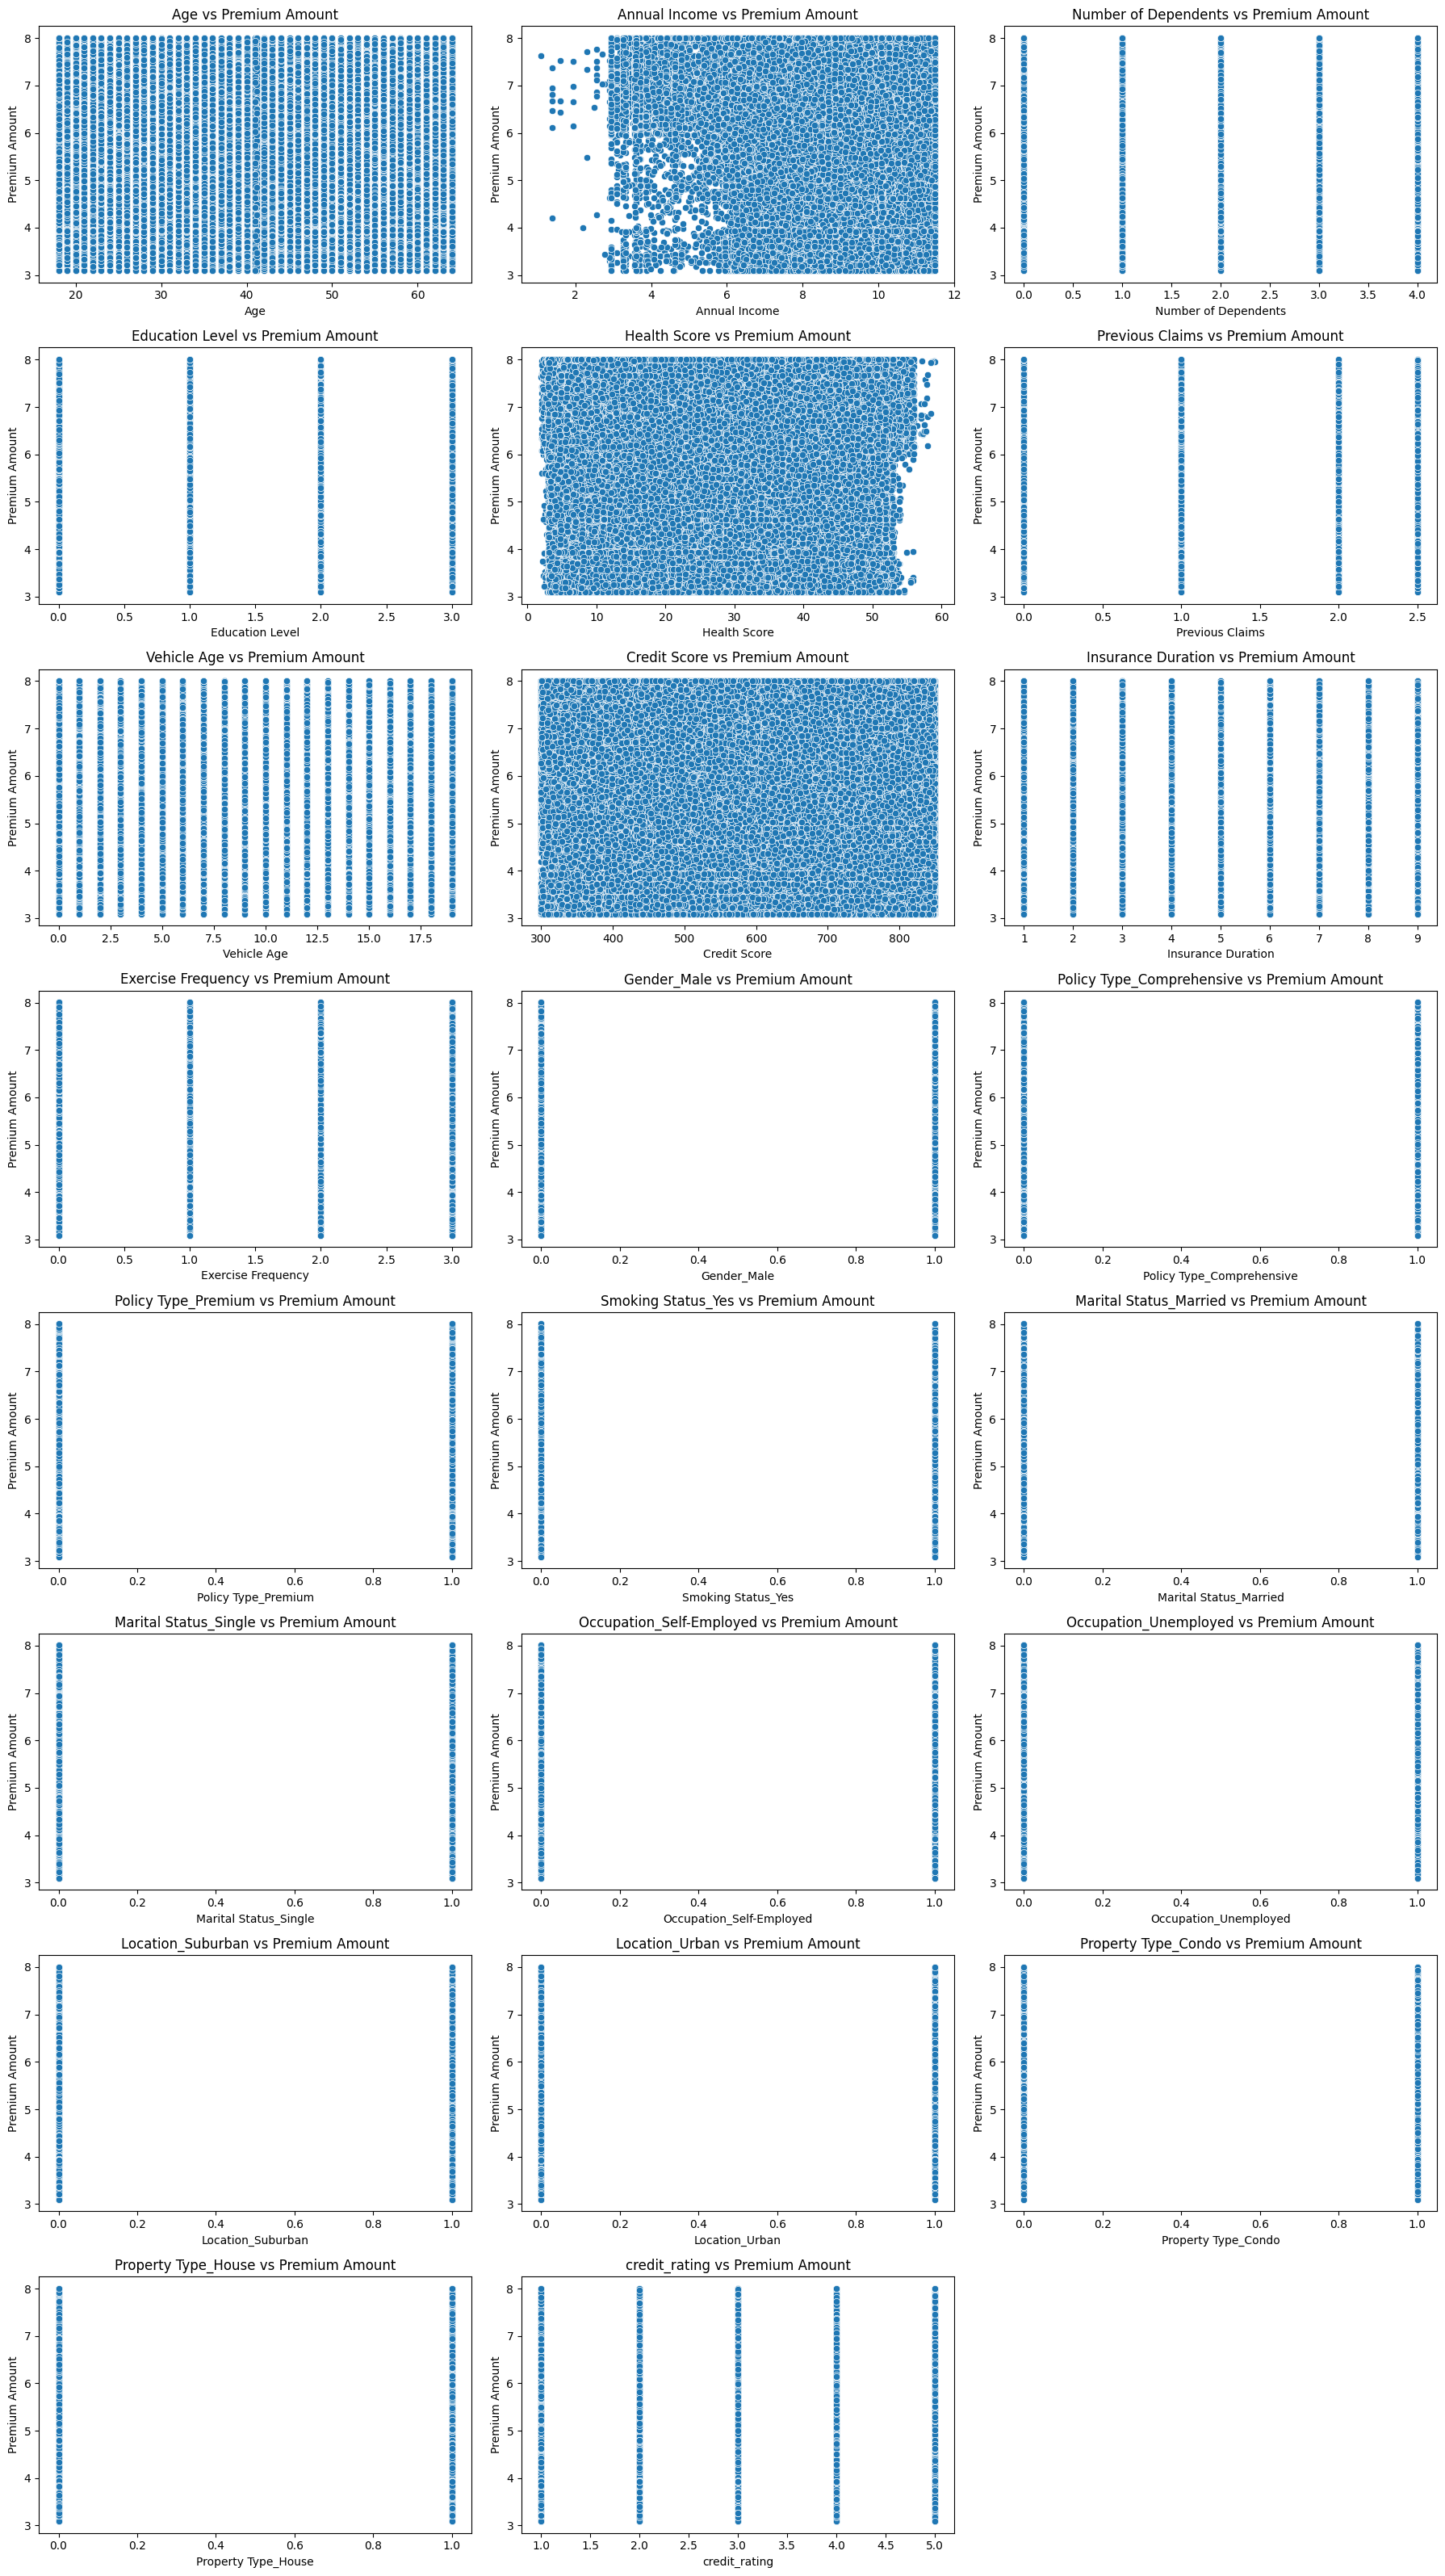

In [12]:


#  Ensure num_cols is a list of numerical column names, excluding the target
num_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'Premium Amount']

# Set up grid layout
num_cols_to_plot = len(num_cols)
cols = 3
rows = int(np.ceil(num_cols_to_plot / cols))

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

# Scatter plots for each numerical column vs Premium Amount
for i, col in enumerate(num_cols):
    sns.scatterplot(data=df, x=col, y='Premium Amount', ax=axes[i])
    axes[i].set_title(f"{col} vs Premium Amount")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
